# Vroum vroum

## Différents tableaux de données sur les voitures en Suisse

**OFS**: [Nouvelles mises en circulation de véhicules routiers par mois (données provisoires 2023, en comparaison avec les années précédentes)](https://www.pxweb.bfs.admin.ch/pxweb/fr/px-x-1103020200_101/-/px-x-1103020200_101.px/)

**auto.swiss**: [Immatriculations de voitures particulières neuves par marque](https://www.auto.swiss/fr/)

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
# On doit préciser l'encodage, parce que l'OFS n'utilise pas le format standart
df = pd.read_csv("data/ofs-vehicules.csv", encoding="Latin-1")
df.head()

,Canton,Groupe / Genre de véhicule,2019,2020,2021,2022
0,Zürich,> Voitures de tourisme,55714,39573,42067,35861
1,Zürich,> Véhicules de transport de personnes,802,969,1268,976
2,Zürich,> Véhicules de transport de choses,5555,4283,4489,3892
3,Zürich,> Véhicules agricoles,271,257,283,241
4,Zürich,> Véhicules industriels,815,693,854,760


In [143]:
df10 = pd.read_excel("data/auto-schweiz_PW_2010.xls", skiprows=9)
df20 = pd.read_excel("data/auto-schweiz_PW_2020_12.xlsx", skiprows=9)
df10.head()

,Marken,2010-01-01 00:00:00,2009-01-02 00:00:00,2010-01-01 00:00:00.1,2009-01-02 00:00:00.1,+/- %,Kum. 10,Kum. 09,Kum. 10.1,Kum. 09.1,+/- %.1
0,Alfa Romeo,1.398228,1.383790,262.0,245.0,6.938776,1.398228,1.383790,262.0,245.0,6.938776
1,Aston Martin,0.048031,0.129907,9.0,23.0,-60.869565,0.048031,0.129907,9.0,23.0,-60.869565
2,Audi,5.779699,6.342841,1083.0,1123.0,-3.561888,5.779699,6.342841,1083.0,1123.0,-3.561888
3,BMW,4.685665,4.541090,878.0,804.0,9.203980,4.685665,4.541090,878.0,804.0,9.203980
4,BMW Alpina,0.005337,0.011296,1.0,2.0,-50.000000,0.005337,0.011296,1.0,2.0,-50.000000


### 1. Nettoyage

On enlève le préfixe inutile de la colonne «Groupe / Genre de véhicule». Pour le reste, le tableau est assez propre.

In [15]:
df["Groupe / Genre de véhicule"] = df["Groupe / Genre de véhicule"].str.replace("> ", "")
df.head()

,Canton,Groupe / Genre de véhicule,2019,2020,2021,2022
0,Zürich,Voitures de tourisme,55714,39573,42067,35861
1,Zürich,Véhicules de transport de personnes,802,969,1268,976
2,Zürich,Véhicules de transport de choses,5555,4283,4489,3892
3,Zürich,Véhicules agricoles,271,257,283,241
4,Zürich,Véhicules industriels,815,693,854,760


### 2. Focus sur les voitures de tourisme

Quelle évolution peut-on observer? Les gens deviennent-ils plus écolos et abandonnent la voiture, vraiment?

In [19]:
tourisme = df["Groupe / Genre de véhicule"] == "Voitures de tourisme"
df[tourisme].head()

,Canton,Groupe / Genre de véhicule,2019,2020,2021,2022
0,Zürich,Voitures de tourisme,55714,39573,42067,35861
7,Bern / Berne,Voitures de tourisme,23452,17640,18763,18825
14,Luzern,Voitures de tourisme,10066,7489,8082,7524
21,Uri,Voitures de tourisme,892,689,718,641
28,Schwyz,Voitures de tourisme,4867,3711,3880,3780


In [158]:
df.sort_values("2022", ascending=False)

,Canton,Groupe / Genre de véhicule,2019,2020,2021,2022
0,Zürich,> Voitures de tourisme,55714,39573,42067,35861
7,Bern / Berne,> Voitures de tourisme,23452,17640,18763,18825
147,Vaud,> Voitures de tourisme,25496,18632,19816,18072
126,Aargau,> Voitures de tourisme,19500,14242,14566,13752
140,Ticino,> Voitures de tourisme,14815,11046,11803,11228
...,...,...,...,...,...,...
108,Appenzell Innerrhoden,> Véhicules agricoles,19,19,21,13
102,Appenzell Ausserrhoden,> Véhicules industriels,17,16,21,13
109,Appenzell Innerrhoden,> Véhicules industriels,7,5,16,9
24,Uri,> Véhicules agricoles,9,18,9,8


In [168]:
df[df["Groupe / Genre de véhicule"] == "> Véhicules agricoles"].sort_values("2022", ascending=False)

,Canton,Groupe / Genre de véhicule,2019,2020,2021,2022
10,Bern / Berne,> Véhicules agricoles,465,460,491,390
3,Zürich,> Véhicules agricoles,271,257,283,241
150,Vaud,> Véhicules agricoles,251,280,261,235
17,Luzern,> Véhicules agricoles,193,228,245,193
66,Fribourg / Freiburg,> Véhicules agricoles,191,189,226,180
115,St. Gallen,> Véhicules agricoles,191,216,226,179
129,Aargau,> Véhicules agricoles,160,212,177,157
94,Schaffhausen,> Véhicules agricoles,107,119,126,122
136,Thurgau,> Véhicules agricoles,139,154,160,107
122,Graubünden / Grigioni / Grischun,> Véhicules agricoles,102,114,115,94


## Détail par marque avec les données d'Auto Schweiz

Qu'est-ce que ça donne si on compare les parts de marché en janvier 2010 et janvier 2020?

Quel est le problème si on se contente des mois de janvier?

Je vous ai mis un système pour fusionner la colonne 2010 et la colonne 2020, mais il y a des problèmes. Arrivez-vous à les résoudre?

In [169]:
df10.columns = [
    "Marque",
    "Part de marché jan 2010",
    "Part de marché jan 2009",
    "2010",
    "2009",
    "+/- %",
    "Kum. 10",
    "Kum. 09",
    "Kum. 10 (2)",
    "Kum. 09 (2)",
    "+/- %.1",
]
df10.head()

,Marque,Part de marché jan 2010,Part de marché jan 2009,2010,2009,+/- %,Kum. 10,Kum. 09,Kum. 10 (2),Kum. 09 (2),+/- %.1
0,Alfa Romeo,1.398228,1.383790,262.0,245.0,6.938776,1.398228,1.383790,262.0,245.0,6.938776
1,Aston Martin,0.048031,0.129907,9.0,23.0,-60.869565,0.048031,0.129907,9.0,23.0,-60.869565
2,Audi,5.779699,6.342841,1083.0,1123.0,-3.561888,5.779699,6.342841,1083.0,1123.0,-3.561888
3,BMW,4.685665,4.541090,878.0,804.0,9.203980,4.685665,4.541090,878.0,804.0,9.203980
4,BMW Alpina,0.005337,0.011296,1.0,2.0,-50.000000,0.005337,0.011296,1.0,2.0,-50.000000


In [170]:
df20.columns = [
    "Marque",
    "Part de marché jan 2020",
    "Part de marché jan 2019",
    "2020",
    "2019",
    "+/- %",
    "Kum. 20",
    "Kum. 19",
    "Kum. 20 (2)",
    "Kum. 19 (2)",
    "+/- %.1",
]
df20.head()

,Marque,Part de marché jan 2020,Part de marché jan 2019,2020,2019,+/- %,Kum. 20,Kum. 19,Kum. 20 (2),Kum. 19 (2),+/- %.1
0,Alfa Romeo,0.851607,1.285175,160.0,269.0,-40.520446,0.851607,1.285175,160.0,269.0,-40.520446
1,Alpine,0.042580,0.047776,8.0,10.0,-20,0.042580,0.047776,8.0,10.0,-20
2,Aston Martin,0.069193,0.057331,13.0,12.0,8.333333,0.069193,0.057331,13.0,12.0,8.333333
3,Audi,5.269321,5.651904,990.0,1183.0,-16.314455,5.269321,5.651904,990.0,1183.0,-16.314455
4,BMW,9.990419,7.562945,1877.0,1583.0,18.572331,9.990419,7.562945,1877.0,1583.0,18.572331


In [172]:
dfm = df10[["Marque", "Part de marché jan 2010"]].merge(
    df20[["Marque", "Part de marché jan 2020"]],
    on="Marque",
    how="inner"
)
dfm.columns = ["Marque", "Jan 2010", "Jan 2020"]
dfm.head()

,Marque,Jan 2010,Jan 2020
0,Alfa Romeo,1.398228,0.851607
1,Aston Martin,0.048031,0.069193
2,Audi,5.779699,5.269321
3,BMW,4.685665,9.990419
4,BMW Alpina,0.005337,0.026613


In [184]:
noms = ["Max", "Erika", "Moritz"]
noms[:-2]

['Max']

In [186]:
dfm = dfm[:-11].copy()

<Axes: >

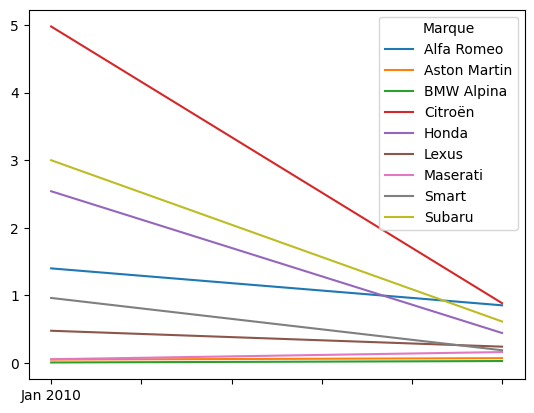

In [201]:
dfm[dfm["Jan 2020"] < 1].set_index("Marque").transpose().plot()

In [191]:
# Vérifions la somme des pourcentages...
dfm.sum(numeric_only=True)

Jan 2010    89.251788
Jan 2020    86.326379
dtype: float64

In [135]:
# Les 15 dernières lignes
dfm.tail(15)

,Marque,Jan 2010,Jan 2020
26,Suzuki,2.380190,1.335959
27,Toyota,4.712349,4.412391
28,Volkswagen,10.001067,11.672344
29,Volvo,4.018572,5.322546
30,NaN,0.000000,0.000000
31,NaN,0.000000,0.000000
32,NaN,0.000000,NaN
33,NaN,0.000000,0.000000
34,NaN,0.000000,0.000000
35,NaN,0.000000,NaN
